In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

plt.style.use("ultrasurfaces_plotstyle.mplstyle")

from toy_mc import generator
from importlib import reload

In [2]:
delta_msq_31 = 2.515e-3
sinsq_theta_23 = 0.565
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
default_pars = generator.OscPars(delta_msq_31, sinsq_2theta_23)

default_response = generator.Response(1., 0.05)

bin_edges = np.logspace(1., 2., 26)

In [5]:
reload(generator)

<module 'toy_mc.generator' from '/Users/trettin/Documents/ultrasurfaces/toy_mc/generator.py'>

In [6]:
gen = generator.Generator(int(1e5), default_response, default_pars)
h0 = gen.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [8]:
from toy_mc.histogram import plot_histogram

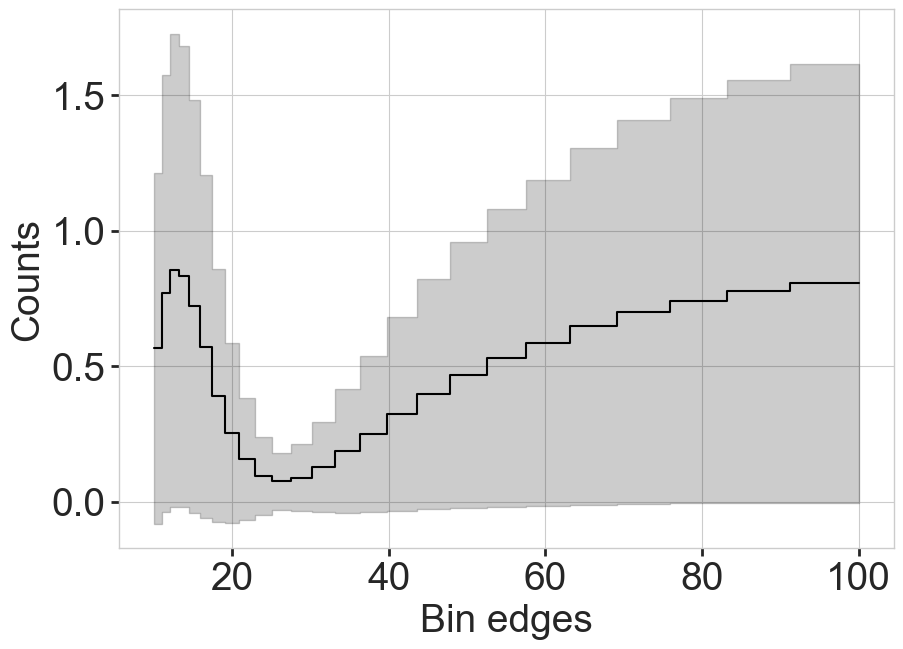

In [9]:
plot_histogram(h0)

In [5]:
gen.events

,true_energy,true_cos(zen),survival_prob,weights_pre_detector,reco_energy,weights
0,8.579378,-1.0,1.0,0.017609,7.894459,0.017609
1,25.233545,-1.0,1.0,0.018515,20.997924,0.018515
2,81.186652,-1.0,1.0,0.773358,113.483052,0.773358
3,29.261698,-1.0,1.0,0.048852,37.067389,0.048852
4,14.772229,-1.0,1.0,0.858491,15.633130,0.858491
...,...,...,...,...,...,...
99995,9.738690,-1.0,1.0,0.274439,12.388736,0.274439
99996,1.836646,-1.0,1.0,0.978930,1.898905,0.978930
99997,4.640370,-1.0,1.0,0.627975,5.048817,0.627975
99998,4.851278,-1.0,1.0,0.265811,4.925370,0.265811


In [7]:
gen_2 = Generator(
    int(1e5),
    default_response,
    OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta),
)
h2 = gen_2.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [8]:
gen_3 = Generator(
    int(1e5), Response(1.2 * default_response.mu, default_response.sigma), default_pars
)
h3 = gen_3.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


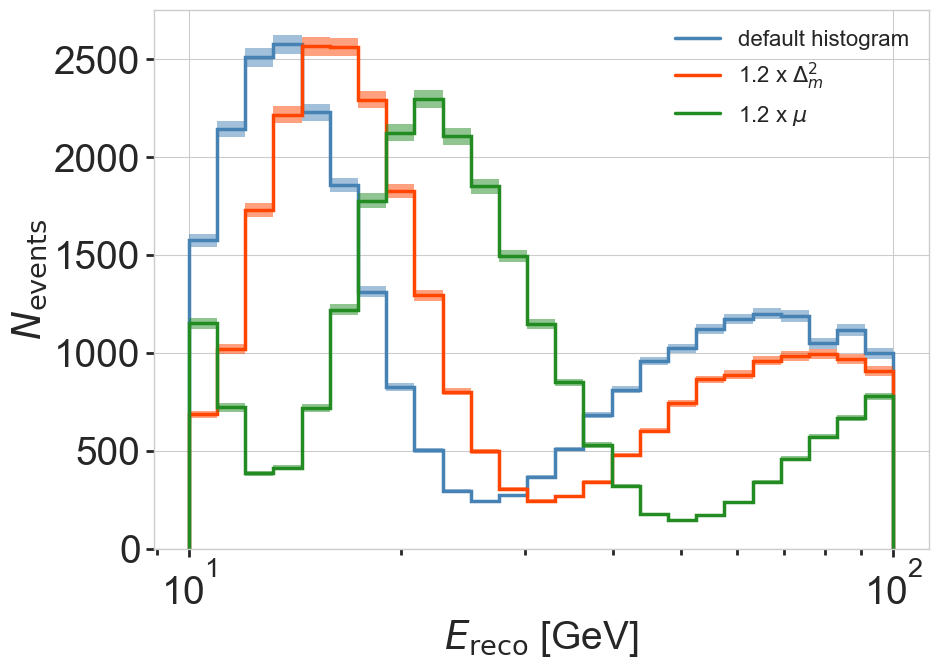

In [9]:
fig = plt.figure()

add_hist(fig, h0, r'default histogram', color='steelblue')

add_hist(fig, h2, r'1.2 x $\Delta_m^2$ ', color='orangered')

add_hist(fig, h3, r'1.2 x $\mu$', color='forestgreen')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ [GeV]')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

In [14]:
gen_3.get_events()["true_energy"]

array([  6.15556832, 148.41133642,  12.78693241, ...,  12.22039438,
        34.59294708,  11.95294611])